from PIL import Image

#Load the image
img = Image.open(r'C:\Users\zyysu\OneDrive\Bureau\MA2\pattern\Image_analysis_project\train_games\game1\1.jpg')

#Get basic details about the image
print(img.format)
print(img.mode)
print(img.size)



In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import skimage.io


# color detection
tune HSV

# 3 channels
path = r"..\train_games\game1\1.jpg"
colormap1 = cv2.imread(path)
colormap1=cv2.cvtColor(colormap1, cv2.COLOR_BGR2RGB)
plt.imshow(colormap1)
chans=cv2.split(colormap1)
colors=("b", "g", "r")
plt.figure()
plt.title("Color histogram")
plt.xlabel("Bins")
plt.ylabel("Number of pixels")
for (chan, c) in zip(chans, colors):
    hist=cv2.calcHist([chan], [0], None, [256], [0,256])
    print()
    plt.plot(hist, color=c)
    plt.xlim([0,256])
    plt.show()



# subsample green 

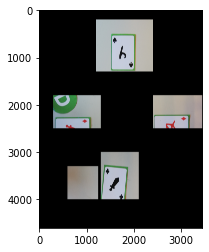

[[[147 133 120]
  [147 133 120]
  [149 135 122]
  ...
  [143 129 116]
  [147 133 120]
  [148 134 121]]

 [[147 133 120]
  [149 135 122]
  [150 136 123]
  ...
  [146 132 119]
  [148 134 121]
  [150 136 123]]

 [[143 129 116]
  [144 130 117]
  [144 130 117]
  ...
  [144 130 117]
  [145 131 118]
  [149 135 122]]

 ...

 [[152 147 144]
  [155 150 147]
  [154 149 146]
  ...
  [150 145 141]
  [151 146 142]
  [154 149 145]]

 [[151 146 143]
  [154 149 146]
  [153 148 145]
  ...
  [152 147 143]
  [152 147 143]
  [152 147 143]]

 [[151 146 143]
  [154 149 146]
  [153 148 145]
  ...
  [152 147 143]
  [152 147 143]
  [152 147 143]]]


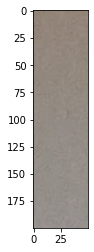

In [2]:
path = r"..\train_games\game2\1.jpg"
img = cv2.imread(path)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# create a mask
mask1 = np.zeros(img.shape[:2], np.uint8)
mask2 = np.zeros(img.shape[:2], np.uint8)
mask3 = np.zeros(img.shape[:2], np.uint8)
mask4 = np.zeros(img.shape[:2], np.uint8)
mask_d = np.zeros(img.shape[:2], np.uint8)
mask1[3000:4000, 1300:2100] = 255
mask2[1800:2500, 2400:4000] = 255
mask3[200:1300, 1200:2400] = 255
mask4[1800:2500,300:1300] = 255
mask_d[3300:4000, 600:1250] = 255
mask =cv2.bitwise_or(mask1, mask2)
mask =cv2.bitwise_or(mask, mask3)
mask =cv2.bitwise_or(mask, mask4)
mask =cv2.bitwise_or(mask, mask_d)
masked_img = cv2.bitwise_and(img,img,mask = mask)
plt.imshow(masked_img)
plt.show()

green = masked_img[3600:3800, 650:700]
print(green)
plt.imshow(green)

# 1. apply filter green (binary result)

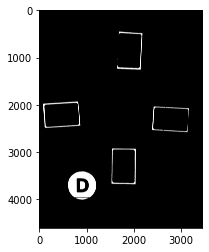

In [3]:
single_image='../train_games/game1/6.jpg'
data1_1 = skimage.io.imread(single_image)#train_games\game1\1.jpg
data1_1_copy = np.copy(data1_1)
#filter_green = np.logical_and(data1_1_copy[:,:,1]<110,data1_1_copy[:,:,1]>90)
filter_r = np.logical_and(data1_1_copy[:,:,0] > 0.2* data1_1_copy[:,:,1],data1_1_copy[:,:,0] < 0.8*data1_1_copy[:,:,1])
filter_b = np.logical_and(data1_1_copy[:,:,2] > 0.2*data1_1_copy[:,:,1],data1_1_copy[:,:,2] < 0.8*data1_1_copy[:,:,1])
filter_green = np.logical_and(filter_r,filter_b)
filter_green_inv =  np.logical_not(filter_green)
data1_1_copy[filter_green] = [255,255,255]
data1_1_copy[filter_green_inv] = [0,0,0]

#data1_1_copy[data1_1[:,:,0]<upper_green] = 0
#data1_1_copy[data1_1[:,:,:]>lower_green] = 0


plt.imshow(data1_1_copy)
plt.show()

# 2. close dealer

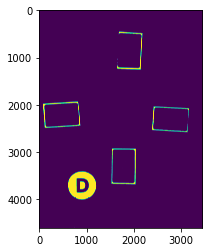

In [4]:
from skimage.morphology import closing,square
from skimage.color import rgb2gray
selem = square(20)

# change in grayscale:
grayscale_data = rgb2gray(data1_1_copy)
data1_1_copy_closed = closing(grayscale_data,selem)
plt.imshow(data1_1_copy_closed)
plt.show()

# 3. apply Circular Hough Transforms

<ipython-input-42-882baa1eb4fb>:11: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  data1_1_copy_closed= color.rgb2gray(data1_1_copy_closed)


certcle center:  [906] [3708]
certcle raduis:  [300]


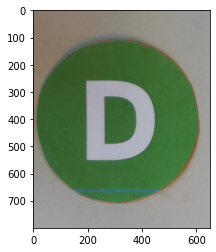

In [42]:
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.util import invert
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.transform import hough_ellipse


# find cercle
data1_1_copy_closed= invert(data1_1_copy_closed)
data1_1_copy_closed= color.rgb2gray(data1_1_copy_closed)

edges = canny(data1_1_copy_closed,sigma=3)

hough_radii = np.arange(200, 400, 20)
result = hough_circle(edges,hough_radii)
accums, cx, cy, radii = hough_circle_peaks(result, hough_radii,
                                           total_num_peaks=1)

print("certcle center: ", cx,cy)
print("certcle raduis: ", radii)



# draw it:
data1_1_copy_draw_cercle = np.copy(data1_1)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=data1_1_copy_closed.shape)
    data1_1_copy_draw_cercle[circy, circx] = [220, 20, 20]

ax.imshow(data1_1_copy_draw_cercle[3300:4100, 600:1250])
plt.show()


# then , we can remove this cercle area and find the extreme coordinates for polygon

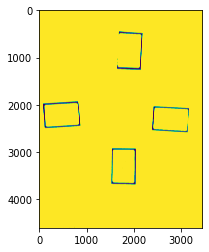

total number of labels:  4
total number of labels:  [0 1 2 3 4]
186018
14742652
332178
336307
328093


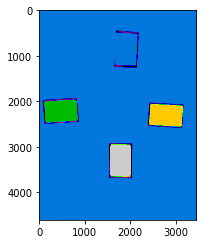

In [41]:
from skimage import measure


data1_1_find_card = np.copy(data1_1_copy_closed)
data1_1_find_card[cy[0]-radii[0]:cy[0]+radii[0],cx[0]-radii[0]:cx[0]+radii[0]] = 1
plt.imshow(data1_1_find_card)
plt.show()
"""
bord_x =[]
bord_y =[]
tot_y,tot_x = np.shape(data1_1_find_card)
for y in range(tot_y):
    for x in range(tot_x):
        if data1_1_find_card[y,x] :
            bord_y.append(y)
            bord_x.append(x)
print(np.shape(bord_x))
print(np.shape(bord_y))
"""
# connected components: 
all_labels, number = measure.label(data1_1_find_card, background=0,return_num=True)
print("total number of labels: ",number)
print("total number of labels: ",np.unique(all_labels))
for i in np.unique(all_labels):
    print(np.count_nonzero(all_labels == i))# card number pixels: 300000 - 400000


# show images of connected components
plt.figure(figsize=(9, 3.5))
plt.subplot(111)
plt.imshow(all_labels, cmap='nipy_spectral')


plt.tight_layout()
plt.show()


# test for detection corner

# extract corners

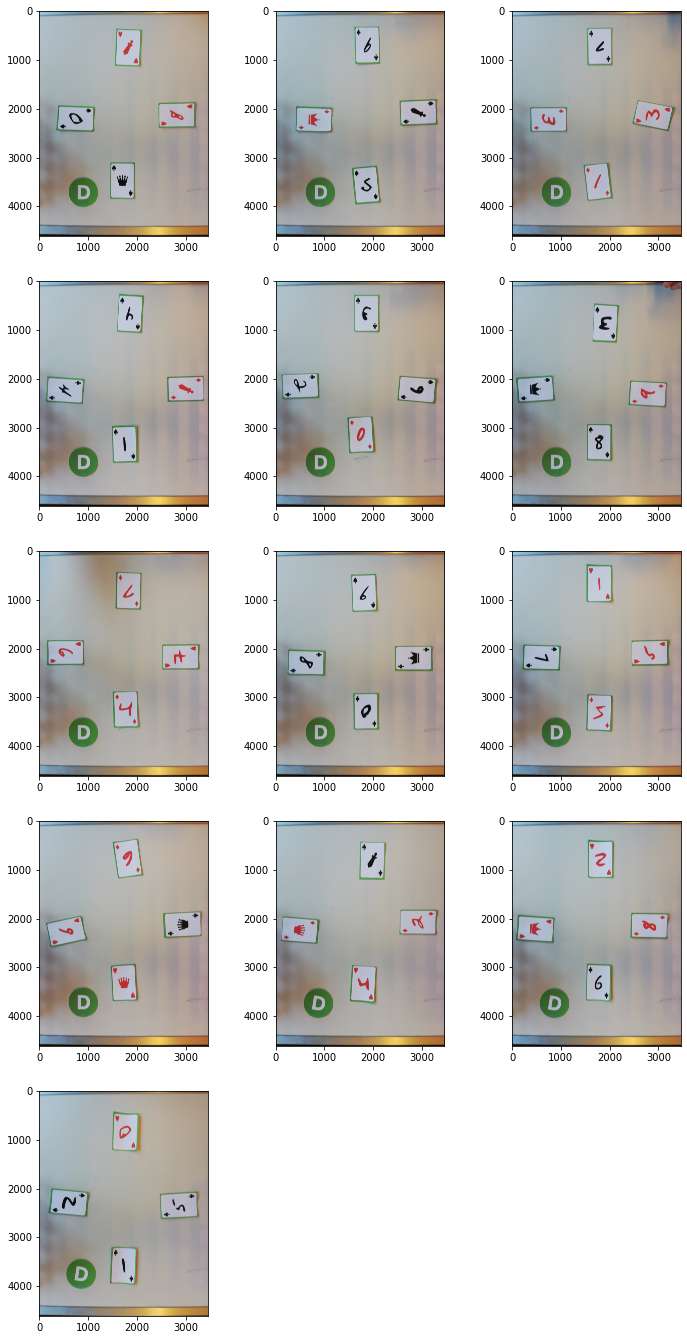

In [17]:
# display images
import cv2
import matplotlib.pyplot as plt

images = []
plt.figure(figsize=(12, 24)) 

for i in range(1):
    for j in range(13):
        img = cv2.imread(f"../train_games/game{i+1}/{j+1}.jpg")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
        plt.subplot(5,3,j+1)
        plt.imshow(img)
plt.show()

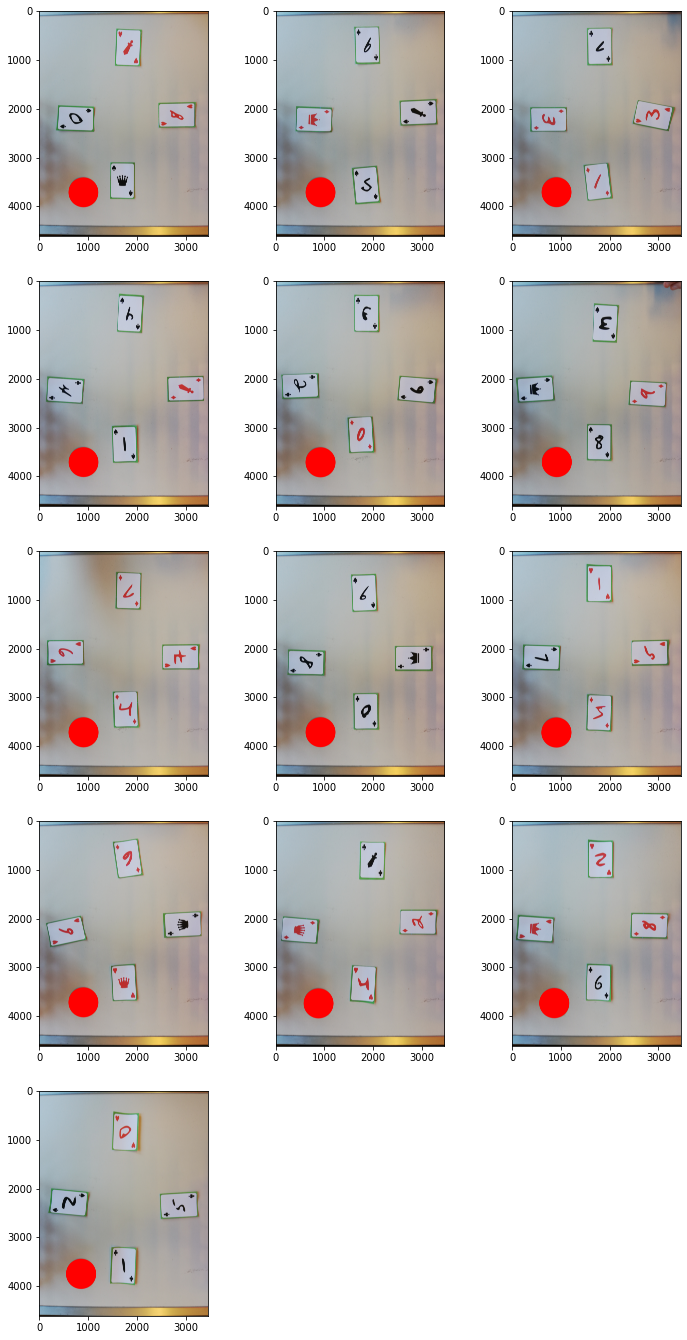

In [18]:
# find dealer
import numpy as np
import cv2

images_C = []
plt.figure(figsize=(12, 24)) 

count = 0
for img in images:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    blurred = cv2.medianBlur(gray, 25) #cv2.bilateralFilter(gray,10,50,50)

    minDist = 100
    param1 = 30 #500
    param2 = 50 #200 #smaller value-> more false circles
    minRadius = 300
    maxRadius = 500 #10

    # docstring of HoughCircles: HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) -> circles
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:
            cv2.circle(img, (i[0], i[1]), i[2], (255, 0, 0), thickness = 10)
            cv2.circle(img, (i[0], i[1]), i[2], (255, 0, 0), thickness = -1)
    count += 1
    images_C.append(img)
    plt.subplot(5,3,count)
    plt.imshow(img)

plt.show()

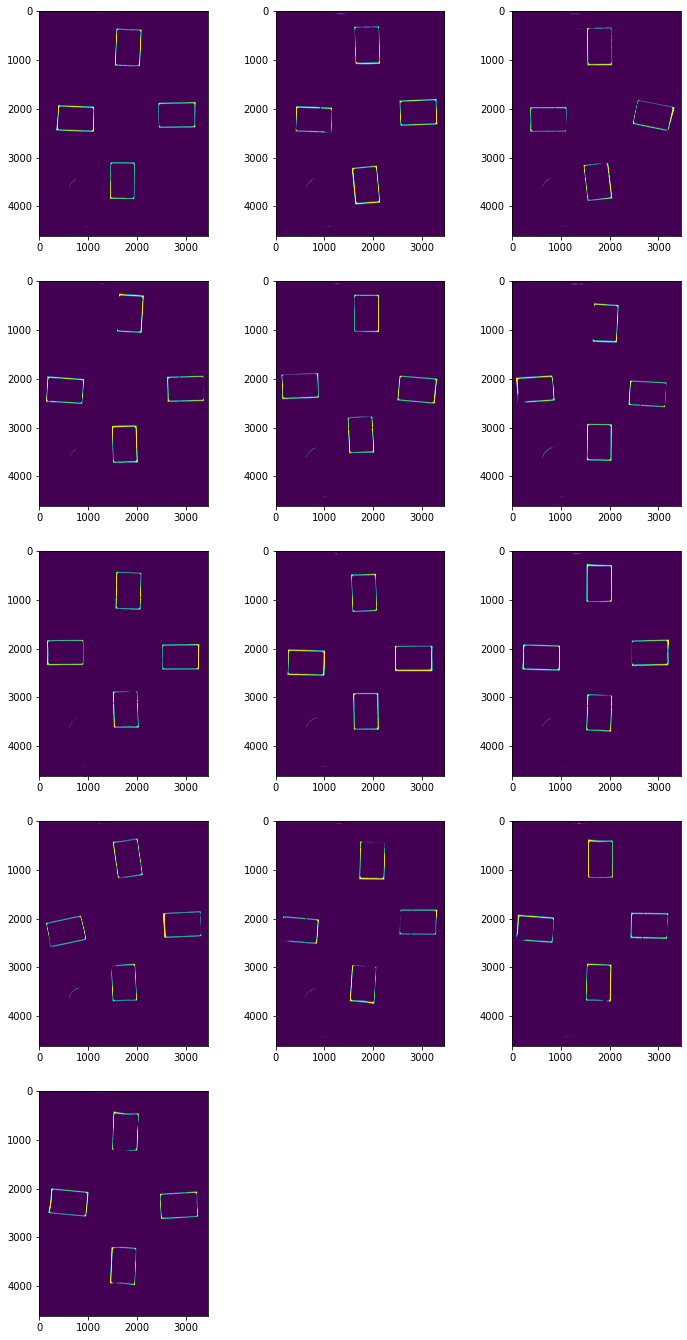

In [19]:
# find cards
import cv2
import numpy as np

masks = []
plt.figure(figsize=(12, 24)) 

count = 0

for img in images_C:

    lower_range = np.array([20,100,20])
    upper_range = np.array([100,200,100])

    mask = cv2.inRange(img, lower_range, upper_range)
    
    masks.append(mask)

    count += 1
    plt.subplot(5,3,count)
    plt.imshow(mask)
    
plt.show()

ValueError: array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8) is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

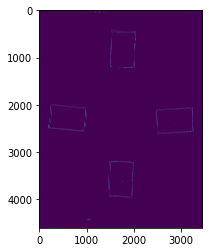

In [60]:
import cv2
edged = cv2.Canny(mask, 30, 200)
contours, hierarchy = cv2.findContours(edged, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
plt.imshow(edged)

cv2.drawContours(mask, contours, -1, (0, 255, 0), 3)
  
plt.imshow('Contours', mask)


(281, 1, 4)
(286, 1, 4)
(235, 1, 4)
(281, 1, 4)
(242, 1, 4)
(263, 1, 4)
(240, 1, 4)
(299, 1, 4)
(273, 1, 4)
(229, 1, 4)
(219, 1, 4)
(265, 1, 4)
(243, 1, 4)


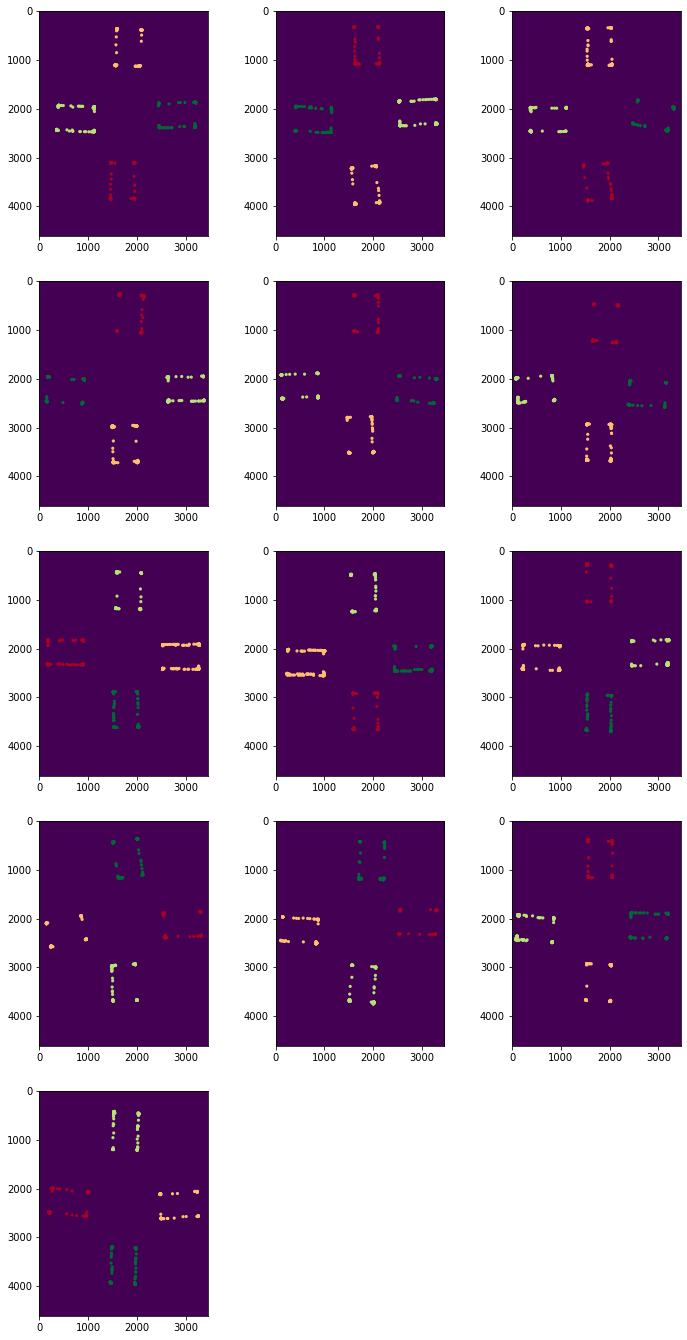

In [20]:
import cv2
import numpy as np
from copy import deepcopy
from sklearn.cluster import KMeans
plt.figure(figsize=(12, 24)) 
count = 0
#seeds_kmean=np.array([[1000,2400],[2000,800],[2000,3800],[3000,2200]])
seeds_kmean=np.array([[2000,3800],[3000,2200],[2000,800],[1000,2400]])
for tmp in masks:
    img = deepcopy(tmp)
    img2 = np.zeros_like(tmp)
    points = []

    minLineLength = 400
    maxLineGap = 150
    lines = cv2.HoughLinesP(img,1,np.pi/180,100,minLineLength=minLineLength,maxLineGap=maxLineGap )
    print(np.shape(lines))
    for line in lines:
        for x1,y1,x2,y2 in line:
            #print(x1,y1,x2,y2)
            #cv2.line(img2, ( x1,y1 ),( x2,y2 ),( 255,255,255 ),2 )
            points.append([x1,y1])
            points.append([x2,y2])
            #cv2.circle(img2, (x1,y1), radius=30, color=(255, 255, 255), thickness=-1)
            #cv2.circle(img2, (x2,y2), radius=30, color=(255, 255, 255), thickness=-1)
    count += 1
    plt.subplot(5,3,count)     
    points_f=np.array(points)
    kmeans = KMeans(n_clusters=4, random_state=0).fit(points_f)
    plt.imshow(img2)
    plt.scatter(points_f[:, 0], points_f[:, 1], c=kmeans.labels_.ravel(), s=10, lw=0, cmap='RdYlGn')
        
plt.show()

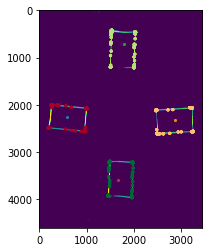

In [24]:
import cv2 as cv
labels = kmeans.labels_.ravel()

players = {new_list: [] for new_list in range(len(np.unique(labels)))}
#print(players)
for index in range(len(labels)):
    players[labels[index]].append(points_f[index])
    
centers=[]
for i in range (4):
    #print(np.mean(players[i],axis = 0))
    #print(players[i])
    center = np.mean(players[i],axis = 0)
    #print(center)
    centers.append(np.mean(players[i],axis = 0))
    #print(centers)
    plt.imshow(masks[12])
    plt.scatter(points_f[:, 0], points_f[:, 1], c=kmeans.labels_.ravel(), s=10, lw=0, cmap='RdYlGn')
    plt.scatter(center[0], center[1],s=10, lw=0, cmap='RdYlGn')
    
plt.show()



left lower: [ 560 2517]
left upper: [ 251 1995]
right lower: [ 957 2532]
right upper: [ 997 2071]


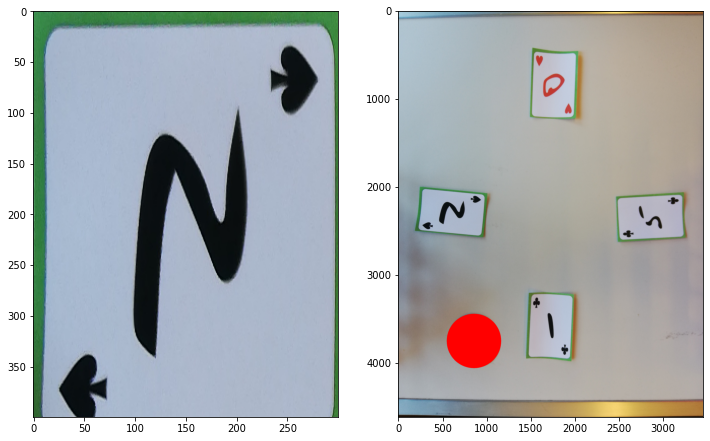

In [28]:
x_min = 5000
y_min = 5000
x_max= 0
y_max = 0
left_lower = []
left_upper = []
right_lower = []
right_upper = []
for coords in players[0]:
    if coords[1]>y_max and (coords[0]<centers[0][0] and coords[1]> centers[0][1]): # left lower
        y_max = coords[1]
        left_lower = coords
        
x_min = 5000
y_min = 5000
x_max= 0
y_max = 0

for coords in players[0]:
    if coords[1]<y_min and (coords[0]<centers[0][0] and coords[1]< centers[0][1]): # left upper
        y_min = coords[1]
        left_upper = coords
        

x_min = 5000
y_min = 5000
x_max= 0
y_max = 0

for coords in players[0]:
    if coords[1]>y_max and (coords[0]>centers[0][0] and coords[1]>centers[0][1]): # right lower
        
        y_min = coords[1]
        right_lower = coords
        
        
x_min = 5000
y_min = 5000
x_max= 0
y_max = 0

for coords in players[0]:
    if coords[1]<y_min and (coords[0]>centers[0][0] and coords[1]<centers[0][1]): # right upper
        y_max = coords[1]
        right_upper = coords
        
        
print("left lower:",left_lower)
print("left upper:",left_upper)
print("right lower:",right_lower)
print("right upper:",right_upper)

################################################################################### affine transform


plt.figure(figsize=(12, 24)) 
#count = 0
#player = [player1, player2, player3, player4]
input_pts = np.float32([left_upper,right_lower,right_upper])
cols=300
rows=400
cols=300
rows=400

output_pts = np.float32([[0,0],[cols,rows],[cols,0]])

M= cv2.getAffineTransform(input_pts , output_pts)

res = cv2.warpAffine(images[12], M, (cols,rows))

plt.subplot(1,2,1)
plt.imshow(res)
plt.subplot(1,2,2)
plt.imshow(images[12])


plt.show()


In [29]:
res

array([[[ 67, 126,  94],
        [ 70, 138,  94],
        [ 75, 141, 100],
        ...,
        [ 69, 148,  72],
        [ 64, 140,  65],
        [ 66, 142,  67]],

       [[ 63, 131,  87],
        [ 62, 138,  83],
        [ 64, 141,  85],
        ...,
        [ 65, 144,  68],
        [ 66, 142,  67],
        [ 67, 143,  69]],

       [[ 70, 145,  93],
        [ 63, 147,  83],
        [ 56, 138,  76],
        ...,
        [ 62, 139,  63],
        [ 67, 143,  67],
        [ 67, 143,  69]],

       ...,

       [[ 50, 101,  48],
        [ 49, 102,  48],
        [ 47, 100,  46],
        ...,
        [ 66, 130,  59],
        [ 63, 128,  58],
        [ 63, 128,  57]],

       [[ 50, 101,  47],
        [ 51, 104,  50],
        [ 48, 101,  47],
        ...,
        [ 60, 122,  55],
        [ 61, 124,  56],
        [ 63, 128,  57]],

       [[ 48,  99,  46],
        [ 51, 104,  50],
        [ 50, 103,  49],
        ...,
        [ 62, 127,  59],
        [ 60, 126,  55],
        [ 63, 129,  58]]